In [1]:
# Intro to Machine Learning
# Homework 1
# Michael Campo ID: 801147955

In [2]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
housing = pd.read_csv('Housing.csv')
housing.head()
m = len(housing)
m
housing.shape # row x column

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


545

(545, 13)

In [4]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Functions

In [5]:
def cost_function(x, y, theta):
    
    prediction = x.dot(theta)
    error = np.subtract(prediction, y)
    sqrError = np.square(error)
    J = 1/(2*m) * np.sum(sqrError)
    
    return J

In [6]:
def gradient_descent(x, y, theta, alpha, iterations):
    
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = x.dot(theta)
        error = np.subtract(prediction, y)
        G = (1/m) * x.transpose().dot(error);
        theta = theta - (G * alpha);
        
        cost_history[i] = cost_function(x, y, theta)

    return theta, cost_history

# Problem 1

In [7]:
# Convert the data columns that have string values into numerical values

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Define the map function
def binary_map(x):
    return x.map({'yes':1, 'no':0})

housing[varlist] = housing[varlist].apply(binary_map)

# Check the dataframe
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [8]:
# Split the Data into Training and Testing Sets
# 70% training, 30% tesing
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 0 )
df_train.shape
df_test.shape

(381, 13)

(164, 13)

# Problem 1a)

In [9]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y_p1_train = df_train['price']
y_p1_test = df_test['price']
df_train_p1a = df_train[num_vars]
df_test_p1a = df_test[num_vars]
df_train_p1a.head()
df_train_p1a.shape

,area,bedrooms,bathrooms,stories,parking
454,4500,3,1,2,0
392,3990,3,1,2,0
231,4320,3,1,1,0
271,1905,5,1,2,0
250,3510,3,1,3,0


(381, 5)

In [15]:
# Reshape the array
tr = len(df_train_p1a)
ts = len(df_test_p1a)
tr_one_p1a = np.ones((tr,1))
ts_one_p1a = np.ones((ts,1))
train_p1a = np.hstack((tr_one_p1a, df_train_p1a))
test_p1a = np.hstack((ts_one_p1a, df_test_p1a))
train_p1a.shape

(381, 6)

In [17]:
# Gradient Descent for p1a training data
theta = np.zeros(6)
iterations1a = 200;
alpha = 0.0000001;
m = len(train_p1a)
theta_p1a_train, cost_history1a_train = gradient_descent(train_p1a, y_p1_train, theta, alpha, iterations1a)
m = len(test_p1a)
theta_p1a_test, cost_history1a_test = gradient_descent(test_p1a, y_p1_test, theta, alpha, iterations1a)

print('Final value of train theta =', theta_p1a_train)
print('Train cost history = ', cost_history1a_train[iterations1a -1])
print('Final value of test theta =', theta_p1a_test)
print('Test cost history = ', cost_history1a_test[iterations1a -1])

Final value of train theta = [-2.60972710e+57 -1.52258923e+61 -7.77757228e+57 -3.40788314e+57
 -4.82652326e+57 -2.19045040e+57]
Train cost history =  3.425473407839426e+129
Final value of test theta = [-1.29085530e+79 -8.47695050e+82 -3.97943359e+79 -1.77387425e+79
 -2.33247258e+79 -1.00970049e+79]
Test cost history =  1.2620236862609164e+173


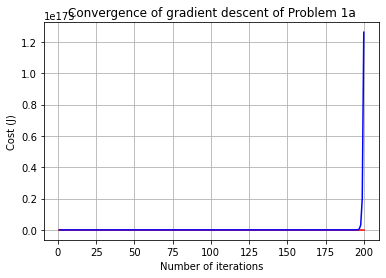

In [18]:
# Plot gradient descent of p1a
plt.plot(range(1,iterations1a+1), cost_history1a_train, color='red');
plt.plot(range(1,iterations1a+1), cost_history1a_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Problem 1a');

# Problem 1b)

In [19]:
# Obtain the input variables
num_varsb = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df_train_p1b = df_train[num_varsb]
df_test_p1b = df_test[num_varsb]
df_train_p1b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
454,4500,3,1,2,1,0,0,0,1,0,0
392,3990,3,1,2,1,0,0,0,0,0,0
231,4320,3,1,1,1,0,0,0,0,0,1
271,1905,5,1,2,0,0,1,0,0,0,0
250,3510,3,1,3,1,0,0,0,0,0,0


In [20]:
# Reshape the array
trb = len(df_train_p1b)
tsb = len(df_test_p1b)
tr_one_p1b = np.ones((trb,1))
ts_one_p1b = np.ones((tsb,1))
train_p1b = np.hstack((tr_one_p1b, df_train_p1b))
test_p1b = np.hstack((ts_one_p1b, df_test_p1b))
train_p1b.shape

(381, 12)

In [21]:
# Gradient Descent for p1b training data
theta = np.zeros(12)
iterations1b = 100;
alpha = 0.0000001;
m = len(train_p1b)
theta_p1b_train, cost_history1b_train = gradient_descent(train_p1b, y_p1_train, theta, alpha, iterations1b)
m = len(test_p1b)
theta_p1b_test, cost_history1b_test = gradient_descent(test_p1b, y_p1_test, theta, alpha, iterations1b)

print('Final value of train theta =', theta_p1b_train)
print('Train cost history = ', cost_history1b_train[iterations1b -1])
print('Final value of test theta =', theta_p1b_train)
print('Test cost history = ', cost_history1b_test[iterations1b -1])

Final value of train theta = [-1.98508619e+28 -1.15815590e+32 -5.91600222e+28 -2.59220275e+28
 -3.67128987e+28 -1.79407139e+28 -3.89065334e+27 -6.83201907e+27
 -8.39060387e+26 -7.41117642e+27 -1.66616381e+28 -5.77362453e+27]
Train cost history =  1.9819339323034193e+71
Final value of test theta = [-1.98508619e+28 -1.15815590e+32 -5.91600222e+28 -2.59220275e+28
 -3.67128987e+28 -1.79407139e+28 -3.89065334e+27 -6.83201907e+27
 -8.39060387e+26 -7.41117642e+27 -1.66616381e+28 -5.77362453e+27]
Test cost history =  1.2005450012188185e+93


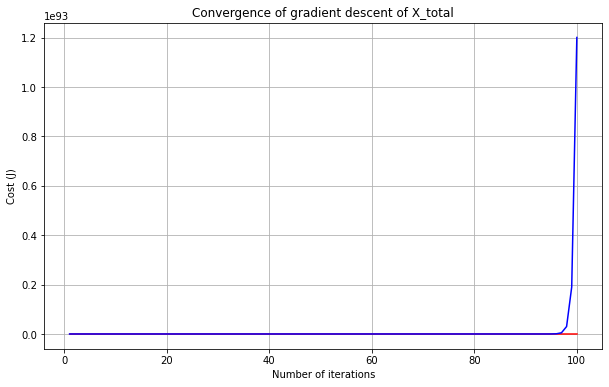

In [22]:
# Plot gradient descent of p1b
plt.plot(range(1,iterations1b+1), cost_history1b_train, color='red');
plt.plot(range(1,iterations1b+1), cost_history1b_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of X_total');

# Problem 2

In [32]:
# Rescale the input variables
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
vars_a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
vars_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

Norm_scaler = MinMaxScaler()
norm_train_p2a = df_train[vars_a]
norm_test_p2a = df_test[vars_a]
norm_train_p2b = df_train[vars_b]
norm_test_p2b = df_test[vars_b]

norm_train_p2a[vars_a] = Norm_scaler.fit_transform(df_train[vars_a])
norm_test_p2a[vars_a] = Norm_scaler.fit_transform(df_test[vars_a])
norm_train_p2b[vars_b] = Norm_scaler.fit_transform(df_train[vars_b])
norm_test_p2b[vars_b] = Norm_scaler.fit_transform(df_test[vars_b])

y_norm_p2a = norm_train_p2a.pop('price')
y_norm_test_p2a = norm_test_p2a.pop('price')
y_norm_p2b = norm_train_p2b.pop('price')
y_norm_test_p2b = norm_test_p2b.pop('price')

norm_train_p2a.head()


# Standardisation (mean-0, sigma-1)
Std_scaler = StandardScaler()
std_train_p2a = df_train[vars_a]
std_test_p2a = df_test[vars_a]
std_train_p2b = df_train[vars_b]
std_test_p2b = df_test[vars_b]

std_train_p2a[vars_a] = Std_scaler.fit_transform(df_train[vars_a])
std_test_p2a[vars_a] = Std_scaler.fit_transform(df_test[vars_a])
std_train_p2b[vars_b] = Std_scaler.fit_transform(df_train[vars_b])
std_test_p2b[vars_b] = Std_scaler.fit_transform(df_test[vars_b])

y_std_p2a = std_train_p2a.pop('price')
y_std_test_p2a = std_test_p2a.pop('price')
y_std_p2b = std_train_p2b.pop('price')
y_std_test_p2b = std_test_p2b.pop('price')

b = norm_train_p2a.values[:,0]


,area,bedrooms,bathrooms,stories,parking
454,0.193548,0.5,0.0,0.333333,0.0
392,0.156495,0.5,0.0,0.333333,0.0
231,0.180471,0.5,0.0,0.000000,0.0
271,0.005013,1.0,0.0,0.333333,0.0
250,0.121622,0.5,0.0,0.666667,0.0


## Problem 2a)

In [33]:
# Reshape the array

tr2 = len(norm_train_p2a)
ts2 = len(norm_test_p2a)
tr2_one_p2a = np.ones((tr2,1))
ts2_one_p2a = np.ones((ts2,1))
Norm_train_p2a = np.hstack((tr2_one_p2a, norm_train_p2a))
Norm_test_p2a = np.hstack((ts2_one_p2a, norm_test_p2a))
Std_train_p2a = np.hstack((tr2_one_p2a, std_train_p2a))
Std_test_p2a = np.hstack((ts2_one_p2a, std_test_p2a))


In [34]:
# Gradient Descent for p2a normalized training data

theta = np.zeros(6)
iterations2aN = 5000;
alpha = 0.002;
m = len(Norm_train_p2a)
theta_p2aN_train, cost_history2aN_train = gradient_descent(Norm_train_p2a, y_norm_p2a, theta, alpha, iterations2aN)
m = len(Norm_test_p2a)
theta_p2aN_test, cost_history2aN_test = gradient_descent(Norm_test_p2a, y_norm_test_p2a, theta, alpha, iterations2aN)

print('Final value of normalized train theta =', theta_p2aN_train)
print('Train cost history = ', cost_history2aN_train[iterations2aN -1])
print('Final value of normalized test theta =', theta_p2aN_test)
print('Test cost history = ', cost_history2aN_test[iterations2aN -1])

Final value of normalized train theta = [0.11930485 0.10999427 0.09977779 0.11673309 0.11234269 0.10365732]
Train cost history =  0.007556509778050631
Final value of normalized test theta = [0.13866706 0.15529402 0.09245325 0.12835861 0.13867408 0.13407635]
Test cost history =  0.00743236133443211


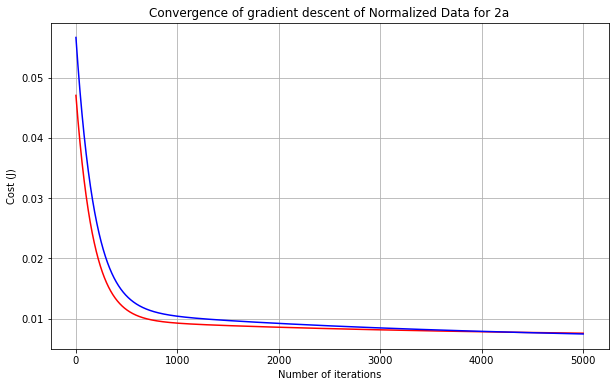

In [35]:
# Plot gradient descent of p2a normalized

plt.plot(range(1,iterations2aN+1), cost_history2aN_train, color='red');
plt.plot(range(1,iterations2aN+1), cost_history2aN_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Normalized Data for 2a');

In [61]:
# Gradient Descent for p2a standardized training data

theta = np.zeros(6)
iterations2a = 4000;
alpha = 0.002;
m = len(Std_train_p2a)
theta_p2a_train, cost_history2a_train = gradient_descent(Std_train_p2a, y_std_p2a, theta, alpha, iterations2a)
m = len(Std_test_p2a)
theta_p2a_test, cost_history2a_test = gradient_descent(Std_test_p2a, y_std_test_p2a, theta, alpha, iterations2a)

print('Final value of standardized train theta =', theta_p2a_train)
print('Train cost history = ', cost_history2a_train[iterations2a -1])
print('Final value of standardized test theta =', theta_p2a_test)
print('Test cost history = ', cost_history2a_test[iterations2a -1])

Final value of standardized train theta = [1.78488895e-16 3.83035550e-01 1.05297772e-01 2.97841732e-01
 2.34222604e-01 1.50377152e-01]
Train cost history =  0.2357595778447401
Final value of standardized test theta = [ 1.25834302e-17  4.00215285e-01 -2.77021042e-03  3.35156185e-01
  2.69962109e-01  2.10854800e-01]
Test cost history =  0.17260860721318985


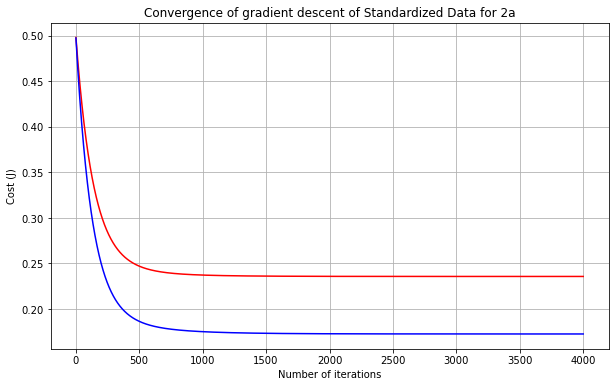

In [64]:
# Plot gradient descent of p2a standardized

plt.plot(range(1,iterations2a+1), cost_history2a_train, color='red');
plt.plot(range(1,iterations2a+1), cost_history2a_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Standardized Data for 2a');

# Problem 2b)

In [65]:
# Reshape the array

tr2b = len(norm_train_p2b)
ts2b = len(norm_test_p2b)
tr2_one_p2b = np.ones((tr2b,1))
ts2_one_p2b = np.ones((ts2b,1))
train_p2b_N = np.hstack((tr2_one_p2b, norm_train_p2b))
test_p2b_N = np.hstack((ts2_one_p2b, norm_test_p2b))
train_p2b_S = np.hstack((tr2_one_p2b, std_train_p2b))
test_p2b_S = np.hstack((ts2_one_p2b, std_test_p2b))

In [66]:
# Gradient Descent for p2b normalized training data

theta = np.zeros(12)
iterations2b = 4000;
alpha = 0.001;
m = len(train_p2b_N)
theta_p2bN_train, cost_history2bN_train = gradient_descent(train_p2b_N, y_norm_p2b, theta, alpha, iterations2b)
m = len(test_p2b_N)
theta_p2bN_test, cost_history2bN_test = gradient_descent(test_p2b_N, y_norm_test_p2b, theta, alpha, iterations2b)

print('Final value of normalized train theta =', theta_p2bN_train)
print('Train cost history = ', cost_history2bN_train[iterations2b -1])
print('Final value of normalized test theta =', theta_p2bN_test)
print('Test cost history = ', cost_history2bN_test[iterations2b -1])

Final value of normalized train theta = [0.07119075 0.04509166 0.05695323 0.05772307 0.06117707 0.07157008
 0.03615303 0.03561135 0.02149649 0.07706422 0.05204593 0.05724567]
Train cost history =  0.00629192241726409
Final value of normalized test theta = [0.08546044 0.0695075  0.05818372 0.06072326 0.07627603 0.0901235
 0.02706232 0.03229991 0.00556986 0.09097532 0.06818516 0.03569247]
Test cost history =  0.00701046543137154


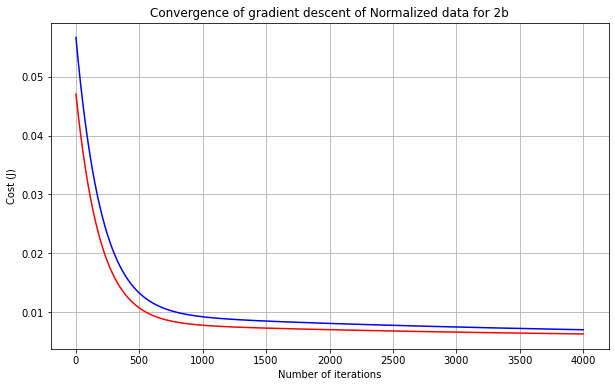

In [67]:
# Plot gradient descent of p2b normalized

plt.plot(range(1,iterations2b+1), cost_history2bN_train, color='red');
plt.plot(range(1,iterations2b+1), cost_history2bN_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Normalized data for 2b');

In [69]:
# Gradient Descent for p2b standardized training data

theta = np.zeros(12)
iterations2bS = 4000;
alpha = 0.001;
m = len(train_p2b_S)
theta_p2bS_train, cost_history2bS_train = gradient_descent(train_p2b_S, y_std_p2b, theta, alpha, iterations2b)
m = len(test_p2b_S)
theta_p2bS_test, cost_history2bS_test = gradient_descent(test_p2b_S, y_std_test_p2b, theta, alpha, iterations2b)

print('Final value of standardized train theta =', theta_p2bS_train)
print('Train cost history = ', cost_history2bS_train[iterations2bS -1])
print('Final value of standardized test theta =', theta_p2bS_test)
print('Test cost history = ', cost_history2bS_test[iterations2bS -1])

Final value of standardized train theta = [1.69499876e-16 2.62318858e-01 7.29841727e-02 2.43634854e-01
 1.92159216e-01 9.56560821e-02 8.79151283e-02 8.77612121e-02
 1.33502290e-01 2.28806014e-01 1.21948919e-01 1.63245081e-01]
Train cost history =  0.1752352097178961
Final value of standardized test theta = [2.41839069e-17 3.14172176e-01 4.09504485e-02 3.06969143e-01
 2.08772834e-01 9.58214824e-02 2.72658776e-02 1.10145102e-01
 2.92528549e-02 2.11744092e-01 1.77318720e-01 9.77380812e-02]
Test cost history =  0.12727070518432163


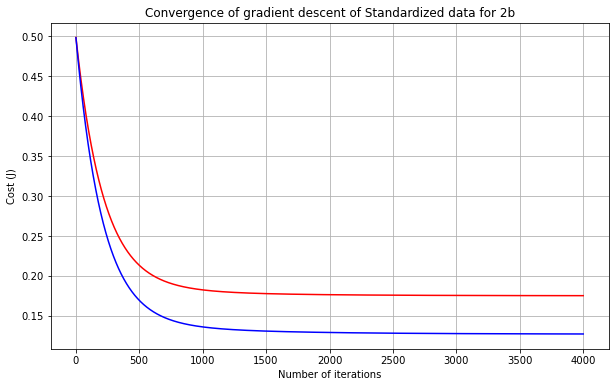

In [70]:
# Plot gradient descent of p2b standardized

plt.plot(range(1,iterations2b+1), cost_history2bS_train, color='red');
plt.plot(range(1,iterations2b+1), cost_history2bS_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Standardized data for 2b');

## Problem 3

In [38]:
# Add paramter penalty to the loss function

def gradient_descent_reg(x, y, theta, alpha, lam, iterations):
    
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = x.dot(theta)
        error = np.subtract(prediction, y)
        G = (1/m) * x.transpose().dot(error);
        theta = (theta*(1-((alpha*lam)/m))) - (G * alpha);
        
        cost_history[i] = cost_function(x, y, theta)

    return theta, cost_history

In [41]:
# Obtain data

norm_train_3a =  np.hstack((tr2_one_p2a, norm_train_p2a))
norm_test_3a = np.hstack((ts2_one_p2a, norm_test_p2a))
std_train_3a = np.hstack((tr2_one_p2a, std_train_p2a))
std_test_3a = np.hstack((ts2_one_p2a, std_test_p2a))
norm_train_3b = np.hstack((tr2_one_p2b, norm_train_p2b))
norm_test_3b = np.hstack((ts2_one_p2b, norm_test_p2b))
std_train_3b= np.hstack((tr2_one_p2b, std_train_p2b))
std_test_3b= np.hstack((ts2_one_p2b, std_test_p2b))

In [54]:
# Gradient Descent for p3a normalized training data

theta = np.zeros(6)
iterations3aN = 4000;
alpha = 0.001;
lam = 0.1
m = len(norm_train_3a)
theta_p3aN_train, cost_history3aN_train = gradient_descent_reg(norm_train_3a, y_norm_p2a, theta, alpha, lam, iterations3aN)
m = len(norm_test_3a)
theta_p3aN_test, cost_history3aN_test = gradient_descent_reg(norm_test_3a, y_norm_test_p2a, theta, alpha, lam, iterations3aN)

print('Final value of normalized train theta =', theta_p3aN_train)
print('Train cost history = ', cost_history3aN_train[iterations3aN -1])
print('Final value of normalized test theta =', theta_p3aN_test)
print('Test cost history = ', cost_history3aN_test[iterations3aN -1])

Final value of normalized train theta = [0.15145894 0.07262315 0.09659443 0.0724987  0.08483292 0.07703822]
Train cost history =  0.008550520487744481
Final value of normalized test theta = [0.17753678 0.10169948 0.09231062 0.07281694 0.10228916 0.09428083]
Test cost history =  0.009189018810084245


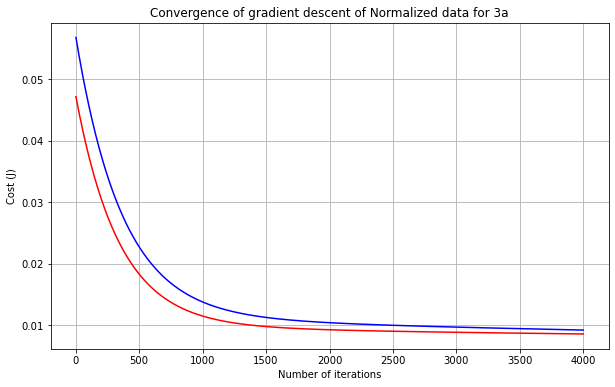

In [56]:
# Plot gradient descent of p3a normalized

plt.plot(range(1,iterations3aN+1), cost_history3aN_train, color='red');
plt.plot(range(1,iterations3aN+1), cost_history3aN_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Normalized data for 3a');

In [57]:
# Gradient Descent for p3a standardized training data

theta = np.zeros(6)
iterations3aS = 4000;
alpha = 0.001;
lam = 10
m = len(std_train_3a)
theta_p3aS_train, cost_history3aS_train = gradient_descent_reg(std_train_3a, y_std_p2a, theta, alpha, lam, iterations3aS)
m = len(std_test_3a)
theta_p3aS_test, cost_history3aS_test = gradient_descent_reg(std_test_3a, y_std_test_p2a, theta, alpha, lam, iterations3aS)

print('Final value of normalized train theta =', theta_p3aS_train)
print('Train cost history = ', cost_history3aS_train[iterations3aS -1])
print('Final value of normalized test theta =', theta_p3aN_test)
print('Test cost history = ', cost_history3aS_test[iterations3aS -1])

Final value of normalized train theta = [1.58300748e-16 3.66594732e-01 1.15989333e-01 2.86528750e-01
 2.26727186e-01 1.56325750e-01]
Train cost history =  0.23600814801933875
Final value of normalized test theta = [0.17753678 0.10169948 0.09231062 0.07281694 0.10228916 0.09428083]
Test cost history =  0.173538353495331


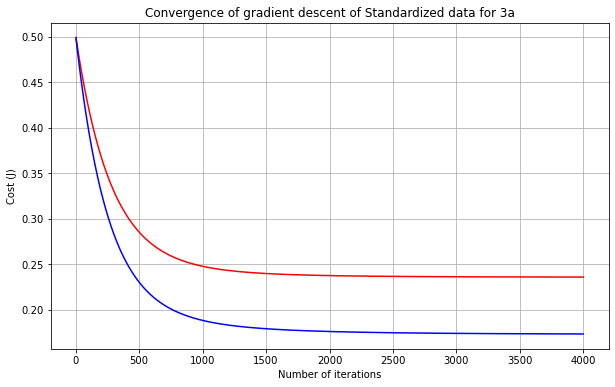

In [58]:
# Plot gradient descent of p3a standardized

plt.plot(range(1,iterations3aS+1), cost_history3aS_train, color='red');
plt.plot(range(1,iterations3aS+1), cost_history3aS_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Standardized data for 3a');

In [59]:
# Gradient Descent for p3b normalized training data

theta = np.zeros(12)
iterations3bN = 4000;
alpha = 0.001;
lam = 10
m = len(norm_train_3b)
theta_p3bN_train, cost_history3bN_train = gradient_descent_reg(norm_train_3b, y_norm_p2b, theta, alpha, lam, iterations3bN)
m = len(norm_test_3b)
theta_p3bN_test, cost_history3bN_test = gradient_descent_reg(norm_test_3b, y_norm_test_p2b, theta, alpha, lam, iterations3bN)

print('Final value of normalized train theta =', theta_p3bN_train)
print('Train cost history = ', cost_history3bN_train[iterations3bN -1])
print('Final value of normalized test theta =', theta_p3bN_test)
print('Test cost history = ', cost_history3bN_test[iterations3bN -1])

Final value of normalized train theta = [0.07164694 0.04388624 0.0561993  0.05560548 0.05945443 0.07167097
 0.0353082  0.03545103 0.02060043 0.07509353 0.05060352 0.05574412]
Train cost history =  0.006363884037193899
Final value of normalized test theta = [0.08612794 0.06471265 0.05602037 0.05532426 0.07111936 0.08943431
 0.02649754 0.03276448 0.00539457 0.08525337 0.06336177 0.03454216]
Test cost history =  0.00726659626712633


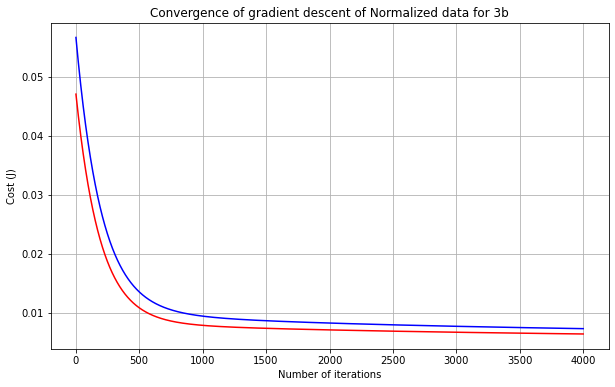

In [60]:
# Plot gradient descent of p3a normalized

plt.plot(range(1,iterations3bN+1), cost_history3bN_train, color='red');
plt.plot(range(1,iterations3bN+1), cost_history3bN_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Normalized data for 3b');

In [48]:
# Gradient Descent for p3a standardized training data

theta = np.zeros(12)
iterations3bS = 4000;
alpha = 0.001;
lam = 10
m = len(std_train_3b)
theta_p3bS_train, cost_history3bS_train = gradient_descent_reg(std_train_3b, y_std_p2b, theta, alpha, lam, iterations3aS)
m = len(std_test_3b)
theta_p3bS_test, cost_history3bS_test = gradient_descent_reg(std_test_3b, y_std_test_p2b, theta, alpha, lam, iterations3aS)

print('Final value of normalized train theta =', theta_p3bS_train)
print('Train cost history = ', cost_history3bS_train[iterations3bS -1])
print('Final value of normalized test theta =', theta_p3aN_test)
print('Test cost history = ', cost_history3bS_test[iterations3bS -1])

Final value of normalized train theta = [1.62919045e-16 2.58124501e-01 7.48240177e-02 2.39906375e-01
 1.89349812e-01 9.52263658e-02 8.77461927e-02 8.65743795e-02
 1.30026198e-01 2.25005614e-01 1.21639590e-01 1.61247497e-01]
Train cost history =  0.1753633816202641
Final value of normalized test theta = [0.17274228 0.0945585  0.08839038 0.06660896 0.09552452 0.08763403]
Test cost history =  0.12785068974469774


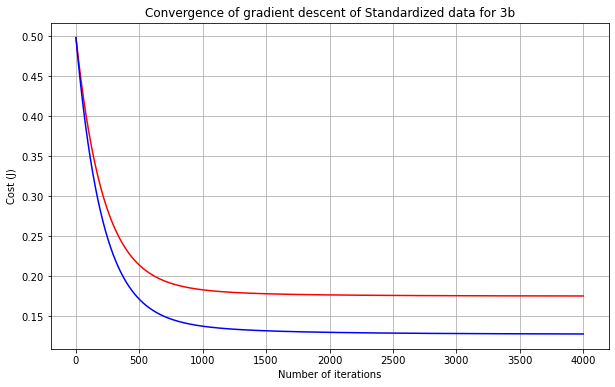

In [49]:
# Plot gradient descent of p3a standardized

plt.plot(range(1,iterations3bS+1), cost_history3bS_train, color='red');
plt.plot(range(1,iterations3bS+1), cost_history3bS_test, color='blue');
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations');
plt.ylabel('Cost (J)');
plt.title('Convergence of gradient descent of Standardized data for 3b');